In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

Tarefas:
1. Carregar os dados de um arquivo CSV fornecido (saude.csv).


In [ ]:
saude = pd.read_csv("/content/4f00tSAaQCullovsmoOv_saude.csv")
saude.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


In [ ]:
saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   age     10 non-null     int64 
 2   height  10 non-null     int64 
 3   weight  10 non-null     int64 
 4   gender  10 non-null     object
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


In [ ]:
saude.duplicated().sum()

0

In [ ]:
saude.shape

(10, 5)

In [ ]:
saude.describe()

,id,age,height,weight
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,34.800000,167.800000,72.600000
std,3.02765,8.753412,7.857056,11.057426
min,1.00000,23.000000,155.000000,55.000000
25%,3.25000,28.250000,161.250000,65.750000
50%,5.50000,35.000000,169.000000,72.500000
75%,7.75000,39.500000,173.750000,79.500000
max,10.00000,50.000000,180.000000,90.000000


2. Criar um histograma da variável 'age' usando Matplotlib.


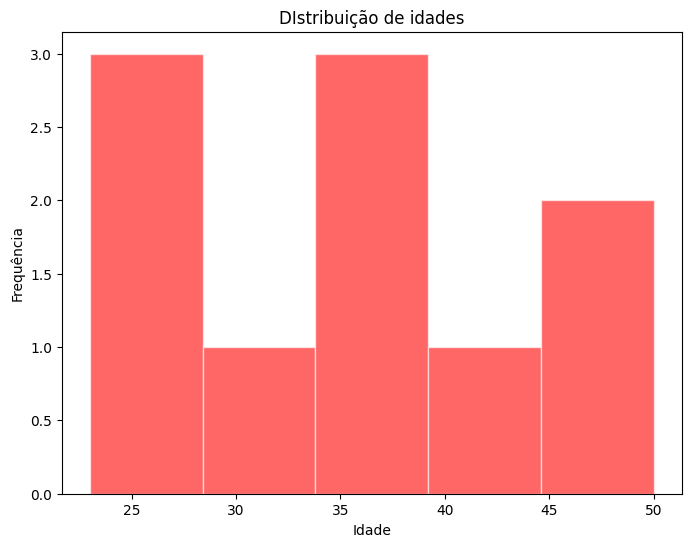

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(saude['age'], bins = 5, alpha=0.6, color='r',edgecolor='white')
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.title('DIstribuição de idades')
plt.show()

3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando
Seaborn.


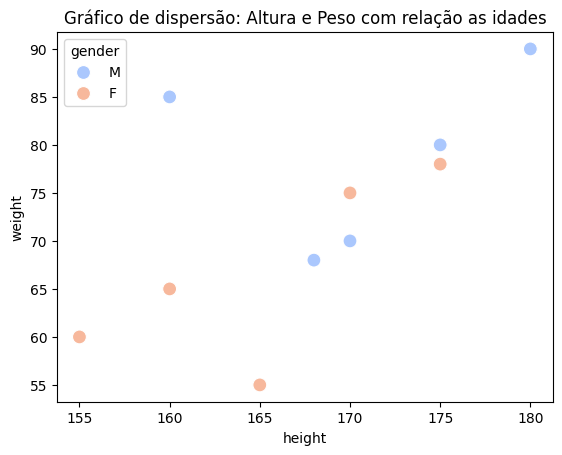

In [ ]:
sns.scatterplot(data=saude, x='height', y='weight', hue = 'gender',s=100, palette='coolwarm')
plt.title('Gráfico de dispersão: Altura e Peso com relação ao gênero')
plt.show()

4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por
'gender' usando Plotly.

In [ ]:
gender = saude['gender'].value_counts().reset_index() #converte o resultado em dataframe
gender.head()

,gender,count
0,M,5
1,F,5


In [ ]:
fig = px.bar(gender,x='gender',y='count',title='Contagem de indivíduos por gênero',
color = 'gender', barmode='group', labels={'gender': 'Gênero', 'count': 'Contagem'}, text_auto=True
)
fig.show()

Tarefas:
1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).


In [ ]:
venda = pd.read_csv('/content/KYJVagX5TlSVZlfI9Oy8_vendas.csv')
venda.head(31)

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180
5,2023-01-06,220
6,2023-01-07,210
7,2023-01-08,190
8,2023-01-09,170
9,2023-01-10,200


In [ ]:
venda['date']

,date
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
5,2023-01-06
6,2023-01-07
7,2023-01-08
8,2023-01-09
9,2023-01-10


In [ ]:
venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    31 non-null     object
 1   sales   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [ ]:
venda.describe()

,sales
count,31.000000
mean,258.387097
std,82.101432
min,100.000000
25%,200.000000
50%,250.000000
75%,325.000000
max,400.000000


In [ ]:
venda.shape

(31, 2)

2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.

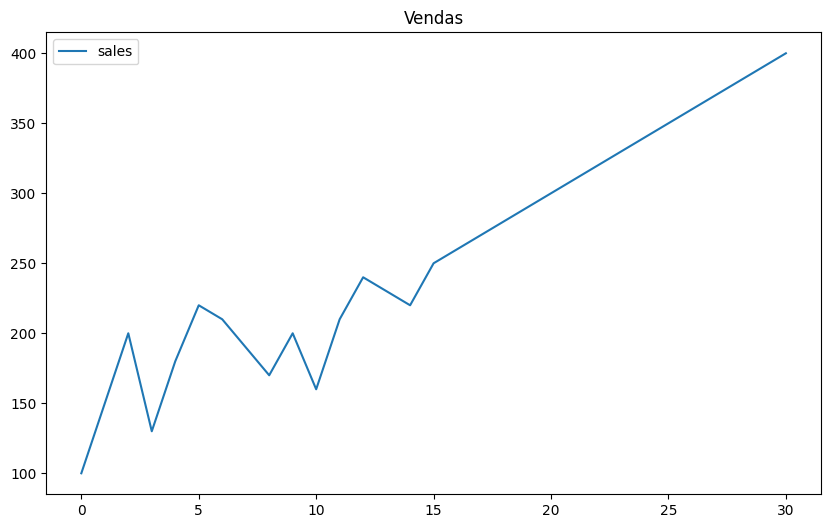

In [ ]:
venda.plot(figsize=(10, 6))
plt.title('Vendas')
plt.show()


3. Criar um gráfico de decomposição sazonal usando Seaborn.


In [ ]:
venda['date'] = pd.to_datetime(venda['date'])
venda.set_index('date', inplace=True)

In [ ]:
venda = venda.asfreq('D')  # Define a frequência diária, ajustando conforme necessário

In [ ]:
# Decomposição sazonal com periodicidade semanal (7 dias)
decomposition = seasonal_decompose(venda['sales'], model='additive', period=7)

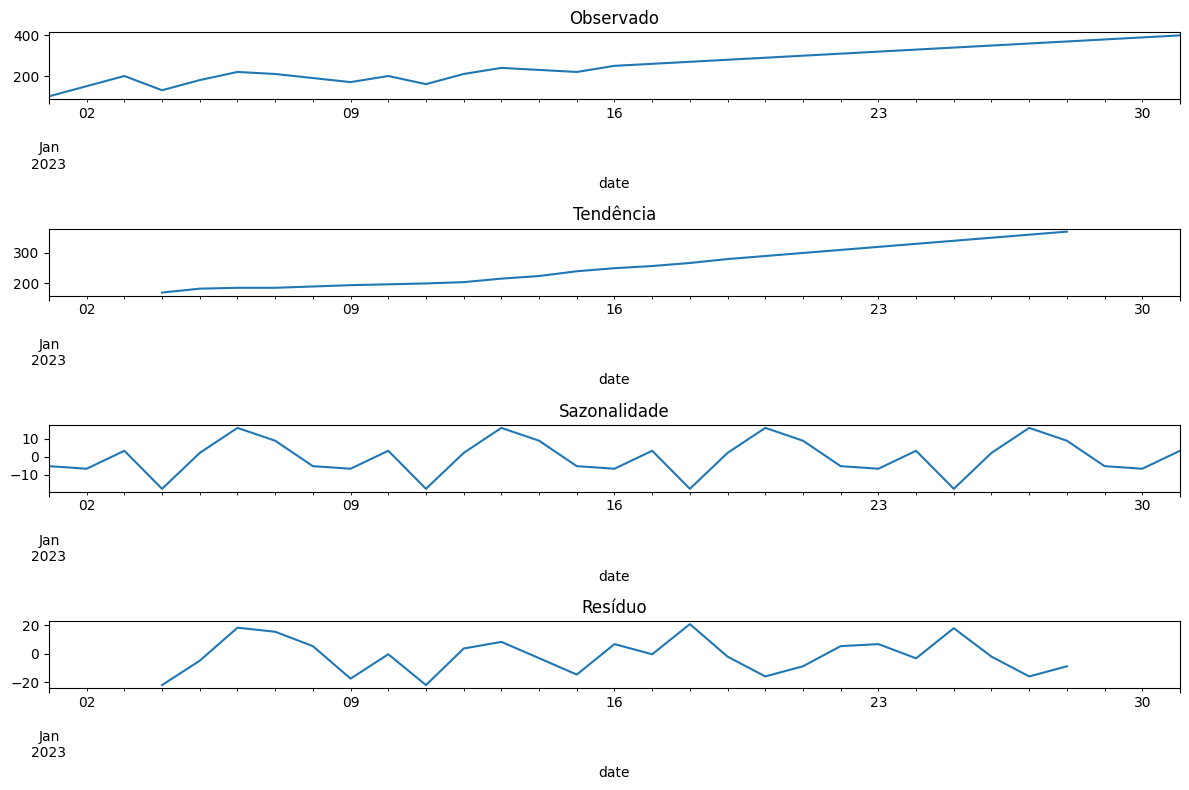

In [ ]:
# Plotar os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observado')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Tendência')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Resíduo')
plt.tight_layout()
plt.show()

4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo do tempo usando Plotly

In [ ]:
venda.head()

,sales
date,
2023-01-01,100
2023-01-02,150
2023-01-03,200
2023-01-04,130
2023-01-05,180


In [ ]:
venda = venda.reset_index()

In [ ]:
# Criando o gráfico de linhas
fig = px.line(venda, x='date', y='sales', title='Vendas ao longo do tempo')
fig.show()